# Dementia Dataset
---

## Import Packages & Set Up
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings('ignore')

palette = ['#800080', '#FF69B4', '#8A2BE2', '#DA70D6', '#9370DB', '#DDA0DD', '#BA55D3']
gradient_palette = sns.light_palette('#620080', as_cmap=True)
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=palette)
sns.set_theme(style="whitegrid", palette=palette)

## Import Data and Examine
---

In [2]:
df = pd.read_csv('data/dementia_data-MRI-features.csv')

In [3]:
print(df.shape)

(373, 15)


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB
None


In [5]:
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


### Statistical Summary
---

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Visit,373.0,1.882038,0.922843,1.000,1.000,2.000,2.000,5.000
MR Delay,373.0,595.104558,635.485118,0.000,0.000,552.000,873.000,2639.000
Age,373.0,77.013405,7.640957,60.000,71.000,77.000,82.000,98.000
EDUC,373.0,14.597855,2.876339,6.000,12.000,15.000,16.000,23.000
SES,354.0,2.460452,1.134005,1.000,2.000,2.000,3.000,5.000
MMSE,371.0,27.342318,3.683244,4.000,27.000,29.000,30.000,30.000
CDR,373.0,0.290885,0.374557,0.000,0.000,0.000,0.500,2.000
eTIV,373.0,1488.128686,176.139286,1106.000,1357.000,1470.000,1597.000,2004.000
nWBV,373.0,0.729568,0.037135,0.644,0.700,0.729,0.756,0.837
ASF,373.0,1.195461,0.138092,0.876,1.099,1.194,1.293,1.587


In [7]:
print ("Number of unique subjects = ",len(df['Subject ID'].unique()))

Number of unique subjects =  150


## Preparing the Data
---

### Data Types
---

To make the data easier to use, we must change the non-numeric columns to be represented numerically.

In [8]:
df['M/F'] = df['M/F'].map({'M': 0, 'F': 1})
df['Hand'] = df['Hand'].map({'R': 0, 'L': 1})

### Target Examination
---

<Axes: xlabel='Group', ylabel='count'>

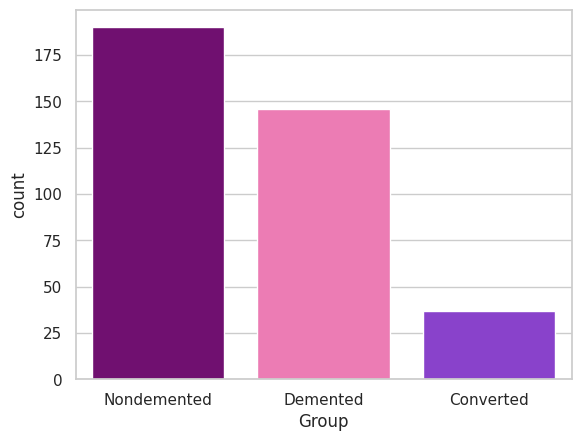

In [9]:
sns.countplot(x=df['Group'], palette=palette)

In [10]:
df.Group.value_counts()

Group
Nondemented    190
Demented       146
Converted       37
Name: count, dtype: int64

The converted category consists of 37 records for 14 subjects.

In [11]:
df.loc[df.Group == 'Converted']

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
33,OAS2_0018,OAS2_0018_MR1,Converted,1,0,1,0,87,14,1.0,30.0,0.0,1406,0.715,1.248
34,OAS2_0018,OAS2_0018_MR3,Converted,3,489,1,0,88,14,1.0,29.0,0.0,1398,0.713,1.255
35,OAS2_0018,OAS2_0018_MR4,Converted,4,1933,1,0,92,14,1.0,27.0,0.5,1423,0.696,1.234
36,OAS2_0020,OAS2_0020_MR1,Converted,1,0,0,0,80,20,1.0,29.0,0.0,1587,0.693,1.106
37,OAS2_0020,OAS2_0020_MR2,Converted,2,756,0,0,82,20,1.0,28.0,0.5,1606,0.677,1.093
38,OAS2_0020,OAS2_0020_MR3,Converted,3,1563,0,0,84,20,1.0,26.0,0.5,1597,0.666,1.099
57,OAS2_0031,OAS2_0031_MR1,Converted,1,0,1,0,86,12,3.0,30.0,0.0,1430,0.718,1.227
58,OAS2_0031,OAS2_0031_MR2,Converted,2,446,1,0,88,12,3.0,30.0,0.0,1445,0.719,1.215
59,OAS2_0031,OAS2_0031_MR3,Converted,3,1588,1,0,91,12,3.0,28.0,0.5,1463,0.696,1.199
81,OAS2_0041,OAS2_0041_MR1,Converted,1,0,1,0,71,16,1.0,27.0,0.0,1289,0.771,1.362


All those classified as Converted were Nondemented on their first visit and Demented on the final visit according to the data card.

We can hence resolve this category into Nondemented (first visit) and Demented (last visit),dropping nine records which lie between the first and final visits.

In [12]:
nondemented = [33,36,57,81,114,194,218,245,261,271,273,295,297,346]
demented = [35,38,59,83,115,195,220,246,265,272,274,296,298,348]
drop = [34,37,58,82,219,262,263,264,347]

In [13]:
for n in nondemented:
    df.Group.iloc[n] = 'Nondemented'
for n in demented:
    df.Group.iloc[n] = 'Demented'

In [14]:
df = df.drop(index =[34,37,58,82,219,262,263,264,347])

Now we can create a new column called dementia.

In [15]:
df['Dementia'] = df.Group == 'Demented'
df = df.drop(columns = ['Group','Subject ID','MRI ID'])

Now we can visualise the target following these changes.

<Axes: xlabel='Dementia', ylabel='count'>

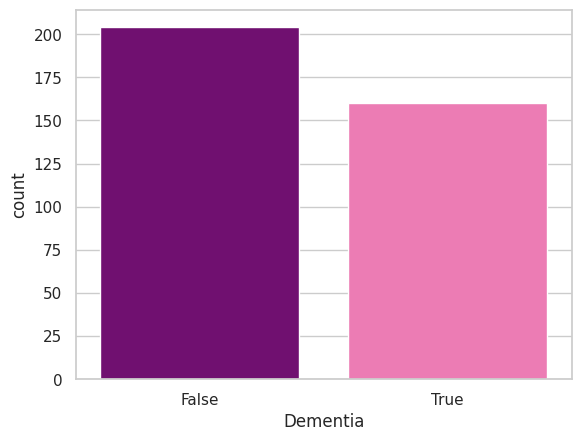

In [16]:
sns.countplot(x=df['Dementia'], palette=palette)

In [17]:
df.Dementia.value_counts()

Dementia
False    204
True     160
Name: count, dtype: int64

### Missing Values
---

In [18]:
df.isnull().sum()

Visit        0
MR Delay     0
M/F          0
Hand         0
Age          0
EDUC         0
SES         19
MMSE         2
CDR          0
eTIV         0
nWBV         0
ASF          0
Dementia     0
dtype: int64

Visualise the missing data to see if there is a pattern.

In [19]:
df[df.isnull().any(axis=1)]

,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Dementia
2,1,0,0,0,75,12,NaN,23.0,0.5,1678,0.736,1.046,True
3,2,560,0,0,76,12,NaN,28.0,0.5,1738,0.713,1.010,True
4,3,1895,0,0,80,12,NaN,22.0,0.5,1698,0.701,1.034,True
10,1,0,0,0,71,16,NaN,28.0,0.5,1357,0.748,1.293,True
11,3,518,0,0,73,16,NaN,27.0,1.0,1365,0.727,1.286,True
12,4,1281,0,0,75,16,NaN,27.0,1.0,1372,0.710,1.279,True
134,1,0,1,0,80,12,NaN,30.0,0.5,1430,0.737,1.228,True
135,2,490,1,0,81,12,NaN,27.0,0.5,1453,0.721,1.208,True
207,1,0,1,0,80,12,NaN,27.0,0.5,1475,0.762,1.190,True
208,2,807,1,0,83,12,NaN,23.0,0.5,1484,0.750,1.183,True


We have already dropped nine rows, so another 19 would be too many to drop.

All rows with missing values are from demented patients, so we cannot use basic imputation as it would introduce bias.

Imputation by group could be used, but this may over-simplify the data and dilute context-specific patterns.

Therefore, K-Nearest-Neighbours imputation will be used.

In [20]:
imputer = KNNImputer(n_neighbors=5)

In [21]:
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

Check there are no more missing values.

In [22]:
df.isnull().sum()

Visit       0
MR Delay    0
M/F         0
Hand        0
Age         0
EDUC        0
SES         0
MMSE        0
CDR         0
eTIV        0
nWBV        0
ASF         0
Dementia    0
dtype: int64

## Data Distribution and Correlations
---

### Multicorrelation
---

In [23]:
df.skew()

Visit       1.066421
MR Delay    0.963429
M/F        -0.301266
Hand        0.000000
Age         0.167696
EDUC       -0.009803
SES         0.189790
MMSE       -2.328402
CDR         1.324719
eTIV        0.504298
nWBV        0.215351
ASF         0.078047
Dementia    0.244553
dtype: float64

### Histogram
---

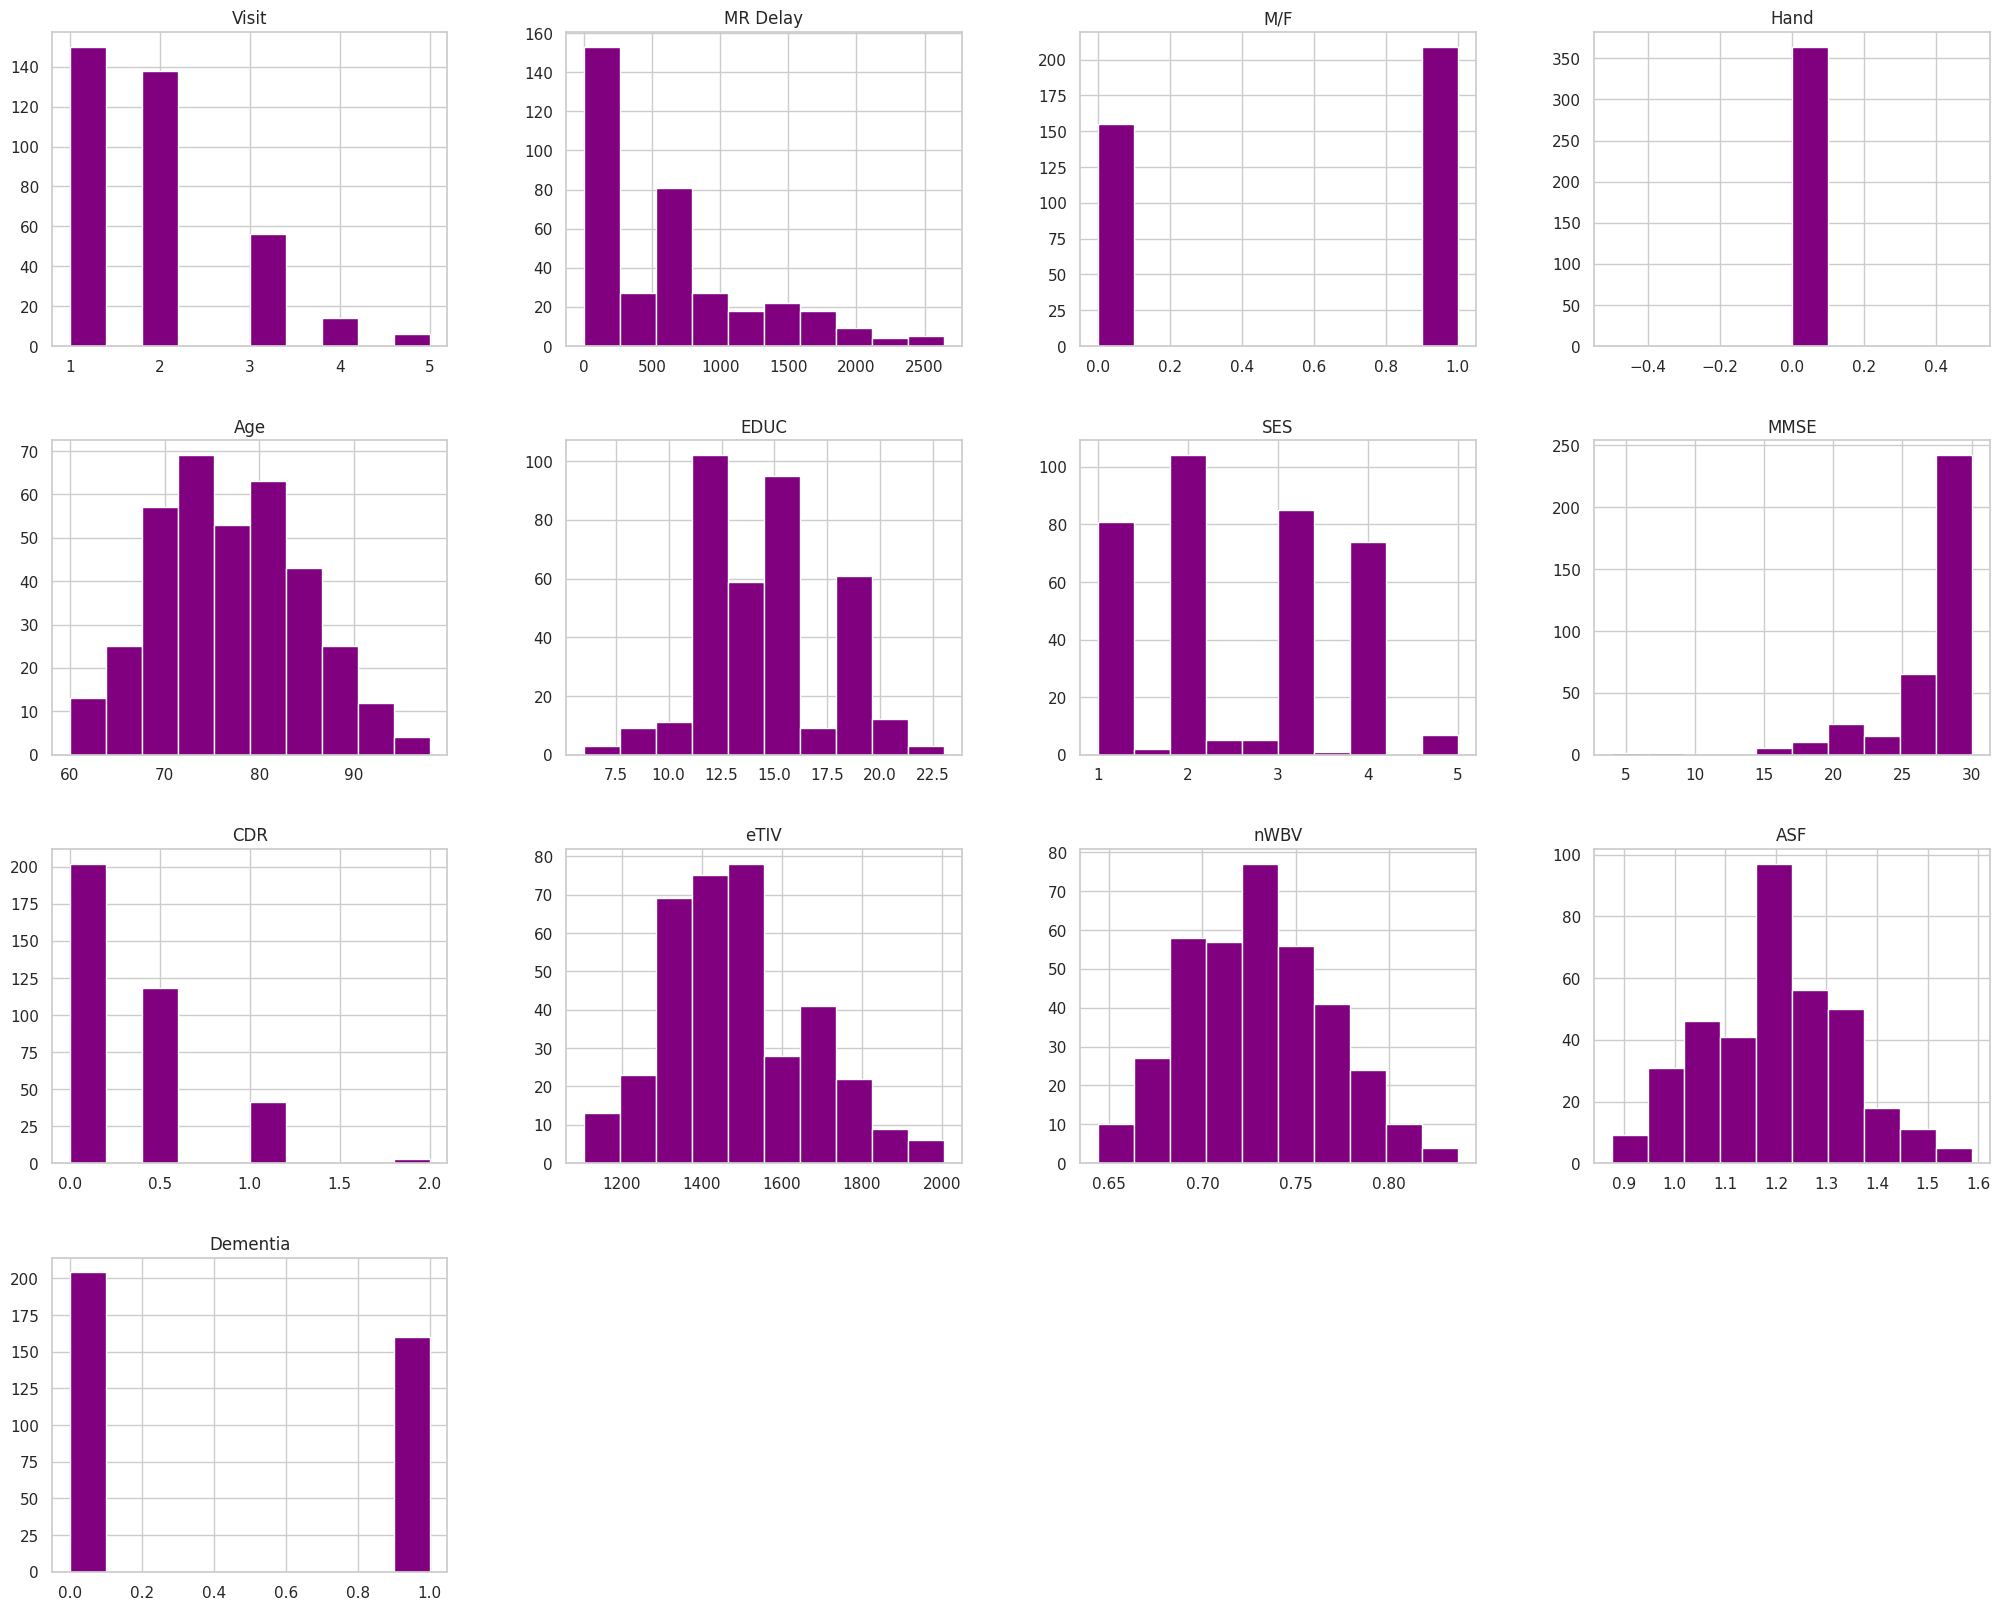

In [24]:
df.hist(figsize=(25,20));

### Correlations
---

For correlation, we will drop the hand column as the dataset only contains right-handed people.

In [25]:
correl = df.drop(columns='Hand').corr() 
correl['Dementia'].sort_values(ascending = False)

Dementia    1.000000
CDR         0.851030
SES         0.138507
ASF         0.018254
eTIV       -0.024467
Age        -0.024938
Visit      -0.041414
MR Delay   -0.068817
EDUC       -0.232042
M/F        -0.244793
nWBV       -0.325175
MMSE       -0.592315
Name: Dementia, dtype: float64

### Heatmap
---

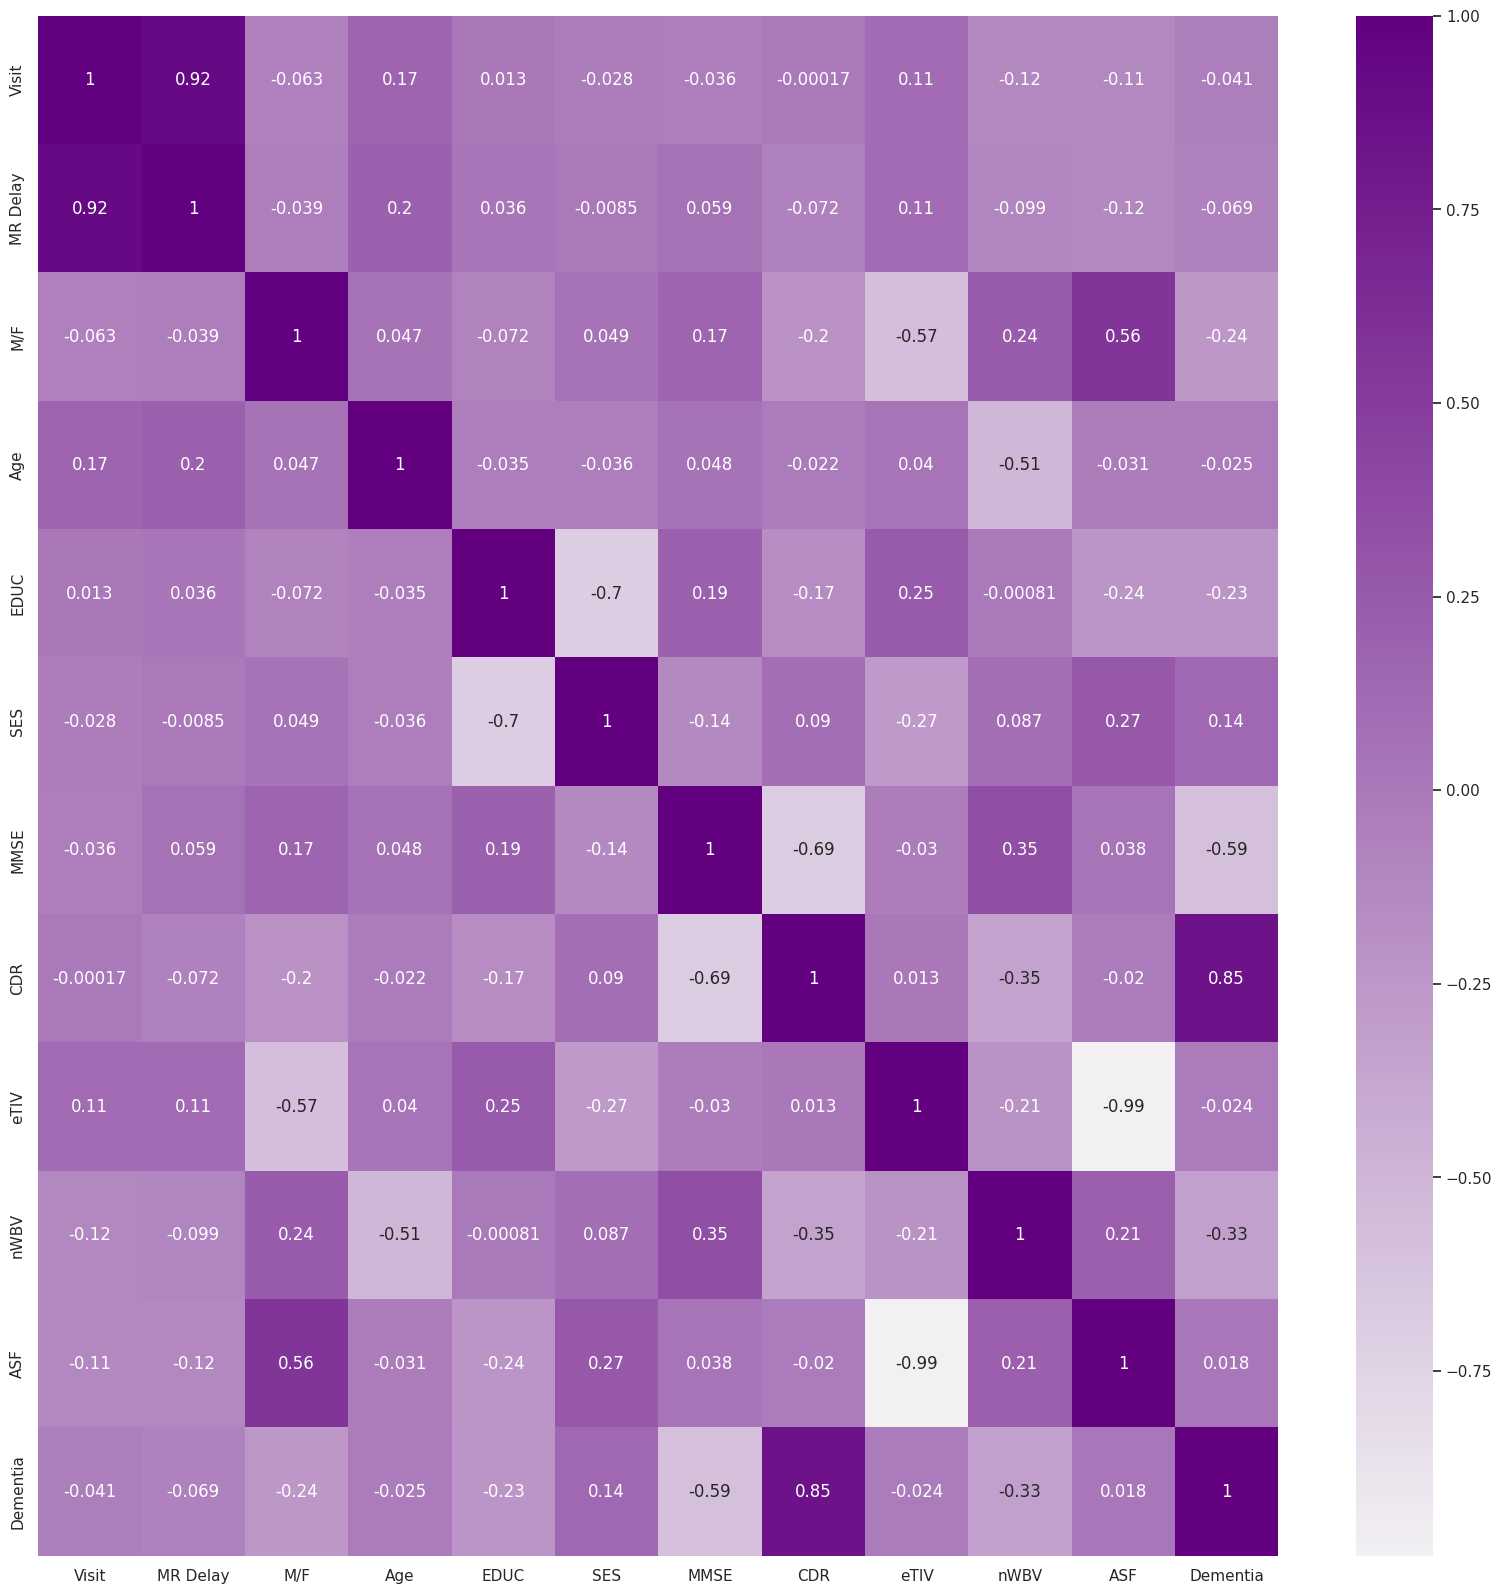

In [26]:
plt.figure(figsize=(20,20))
sns.heatmap(correl, annot=True, cmap=gradient_palette)
plt.show()

In [27]:
#df['M/F'] = df['M/F'].map({0 : 'M', 1 : 'F'})
#df['Hand'] = df['Hand'].map({0 : 'R', 1 : 'L'})

# Predicting Dementia
---

## Using bnlearn
---

In [28]:
import bnlearn
from sklearn.model_selection import train_test_split

### Train Test Split
---

In [29]:
X = df.drop(columns=['Dementia'])
y = df['Dementia']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Need to combine X_train and y_train for bnlearn.

In [30]:
train_data = pd.concat([X_train, y_train], axis=1)

### Bayesian Network Training
---

First we must learn the structure of the network.

In [31]:
model = bnlearn.structure_learning.fit(train_data, methodtype='hc', scoretype='bic')

[bnlearn] >Warning: Computing DAG with 13 nodes can take a very long time!
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).


And now plot it.

[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model
[bnlearn] >Warning: [graphviz_layout] layout not found. The layout [spring_layout] is used instead.


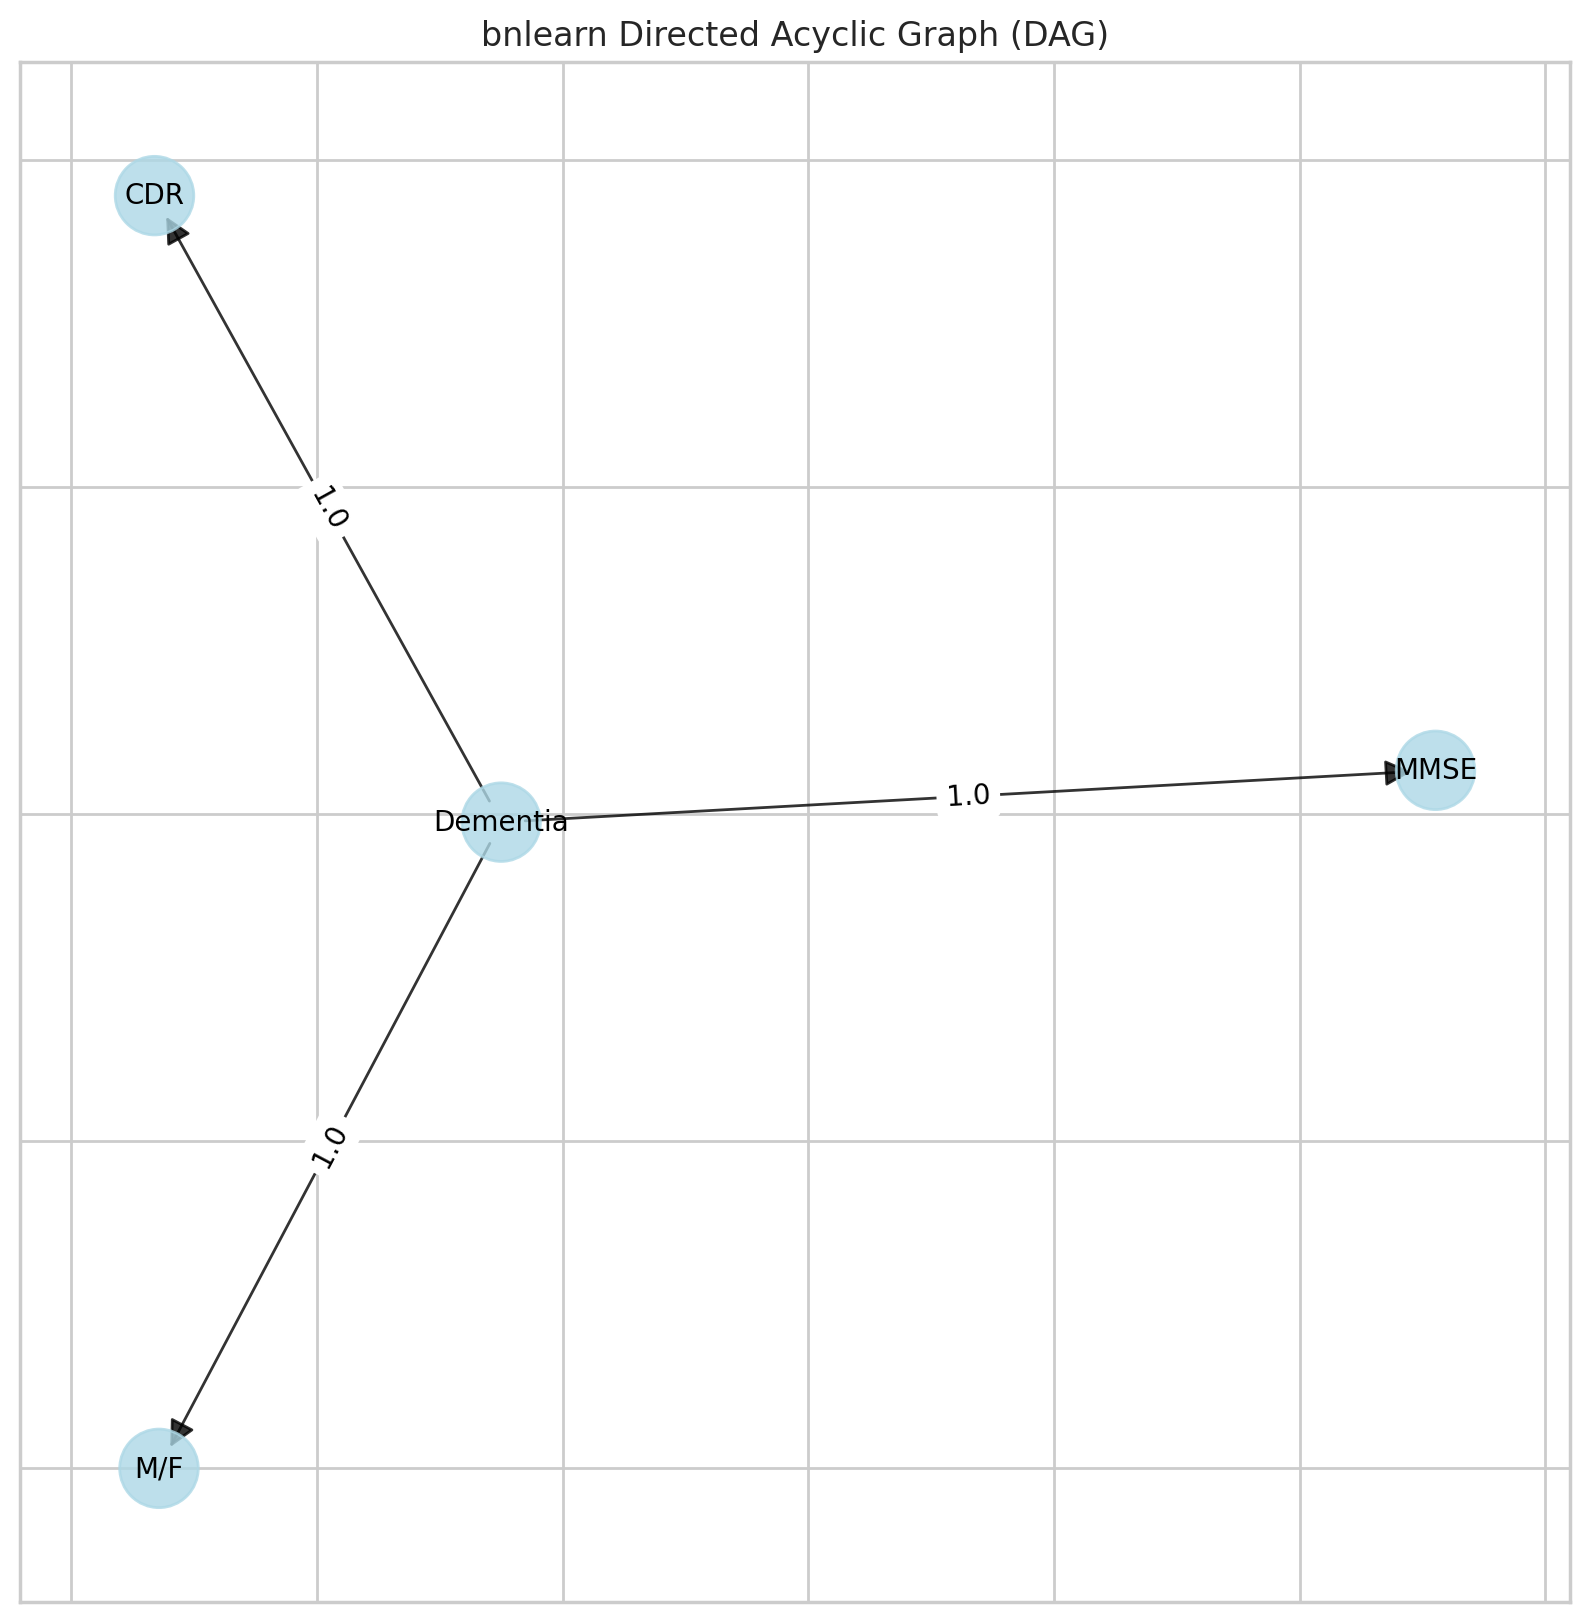

{'fig': <Figure size 2000x2000 with 1 Axes>,
 'ax': <Figure size 2000x2000 with 1 Axes>,
 'pos': {'Dementia': array([-0.04998009, -0.01227783]),
  'M/F': array([-0.32843148, -1.        ]),
  'MMSE': array([0.71048877, 0.06694756]),
  'CDR': array([-0.33207719,  0.94533027])},
 'G': <networkx.classes.digraph.DiGraph at 0x7fdedff3a1e0>,
 'node_properties': {'Visit': {'node_color': '#ADD8E6', 'node_size': 800},
  'MR Delay': {'node_color': '#ADD8E6', 'node_size': 800},
  'M/F': {'node_color': '#ADD8E6', 'node_size': 800},
  'Hand': {'node_color': '#ADD8E6', 'node_size': 800},
  'Age': {'node_color': '#ADD8E6', 'node_size': 800},
  'EDUC': {'node_color': '#ADD8E6', 'node_size': 800},
  'SES': {'node_color': '#ADD8E6', 'node_size': 800},
  'MMSE': {'node_color': '#ADD8E6', 'node_size': 800},
  'CDR': {'node_color': '#ADD8E6', 'node_size': 800},
  'eTIV': {'node_color': '#ADD8E6', 'node_size': 800},
  'nWBV': {'node_color': '#ADD8E6', 'node_size': 800},
  'ASF': {'node_color': '#ADD8E6', 'no

In [32]:
bnlearn.plot(model)

Now we have to learn the parameters.

In [33]:
model = bnlearn.parameter_learning.fit(model, train_data)

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of Dementia:
+---------------+----------+
| Dementia(0.0) | 0.512006 |
+---------------+----------+
| Dementia(1.0) | 0.487994 |
+---------------+----------+
[bnlearn] >CPD of M/F:
+----------+---------------------+---------------------+
| Dementia | Dementia(0.0)       | Dementia(1.0)       |
+----------+---------------------+---------------------+
| M/F(0.0) | 0.45385779122541603 | 0.5095238095238095  |
+----------+---------------------+---------------------+
| M/F(1.0) | 0.546142208774584   | 0.49047619047619045 |
+----------+---------------------+---------------------+
[bnlearn] >CPD of MMSE:
+------------+---------------------+----------------------+
| Dementia   | Dementia(0.0)       | Dementia(1.0)        |
+------------+---------------------+----------------------+
| MMSE(

### Testing the Model
---

Now we can test the model.

In [34]:
test_data = X_test.copy()

In [35]:
y_pred = []
for index, row in test_data.iterrows():
    evidence = {key: row[key] for key in model['model'].nodes() if key in row}
    q = bnlearn.inference.fit(model, variables=['Dementia'], evidence=evidence)
    y_pred.append(q.values.argmax())

[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+------------+---------+
|    |   Dementia |       p |
+====+============+=========+
|  0 |          0 | 0.85492 |
+----+------------+---------+
|  1 |          1 | 0.14508 |
+----+------------+---------+
[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+------------+---------+
|    |   Dementia |       p |
+====+============+=========+
|  0 |          0 | 0.85492 |
+----+------------+---------+
|  1 |          1 | 0.14508 |
+----+------------+---------+
[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+------------+----------+
|    |   Dementia |        p |
+====+============+==========+
|  0 |          0 | 0.266862 |
+----+------------+----------+
|  1 |          1

In [36]:
y_pred = pd.DataFrame(y_pred, columns=['Dementia_pred'])

### Evaluate Model
---

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [38]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.95


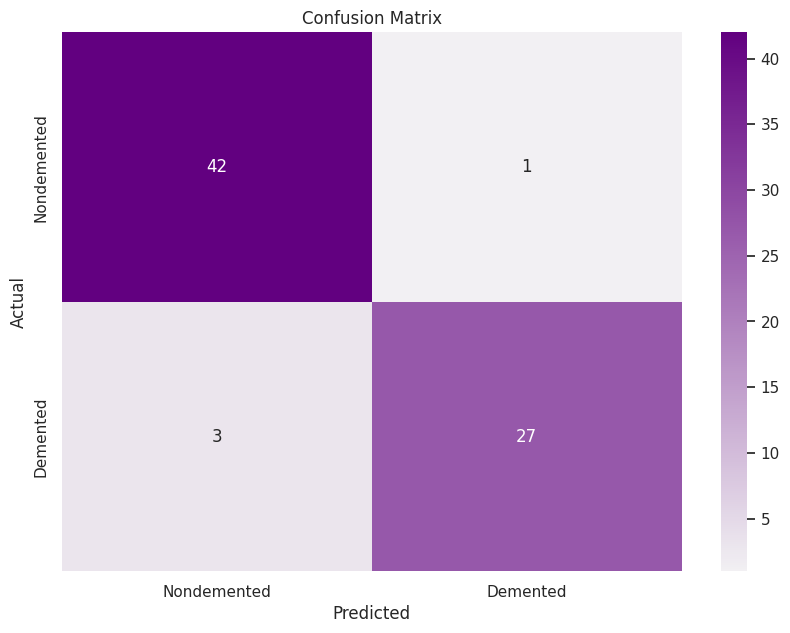

In [39]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=gradient_palette, xticklabels=['Nondemented', 'Demented'], yticklabels=['Nondemented', 'Demented'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [40]:
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95        43
         1.0       0.96      0.90      0.93        30

    accuracy                           0.95        73
   macro avg       0.95      0.94      0.94        73
weighted avg       0.95      0.95      0.94        73

